# Preamble

In [29]:
import pandas as pd

from sklearn.model_selection import train_test_split

import sys
sys.path.append('..') #hack to import from parent directory
from plot_utils import visualize_tree, plot_results


In [30]:
titanic = pd.read_csv('Titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Ready datasets

First clean up the data a little

In [31]:
#one-hot encode categorical features
male_column = pd.get_dummies(titanic["Sex"])[['male']]
embark_columns = pd.get_dummies(titanic["Embarked"])

#replace categorical features with new features
titanic = pd.concat([titanic, male_column, embark_columns], axis='columns').drop(['Sex', 'Embarked'], axis='columns')

#drop non-categorical text features
titanic = titanic.drop(['Name', 'Ticket', 'Cabin'], axis='columns')

#drop data with NaN values
titanic = titanic.dropna()

titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,False,False,True,False
886,887,0,2,27.0,0,0,13.0000,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,True,False,False


Train and test sets

In [32]:
y = titanic['Survived']
X = titanic.drop('Survived', axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=504)


# Training a decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=504)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=504)

In [34]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,False,False,True,False
886,887,0,2,27.0,0,0,13.0000,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,True,False,False


<font size = 6>What could possibly go wrong?</font>

In [35]:
tree_clf.score(X_train, y_train)

1.0

Suspicious. How about the test?

In [36]:
tree_clf.score(X_test, y_test)

0.7622377622377622

What happened?

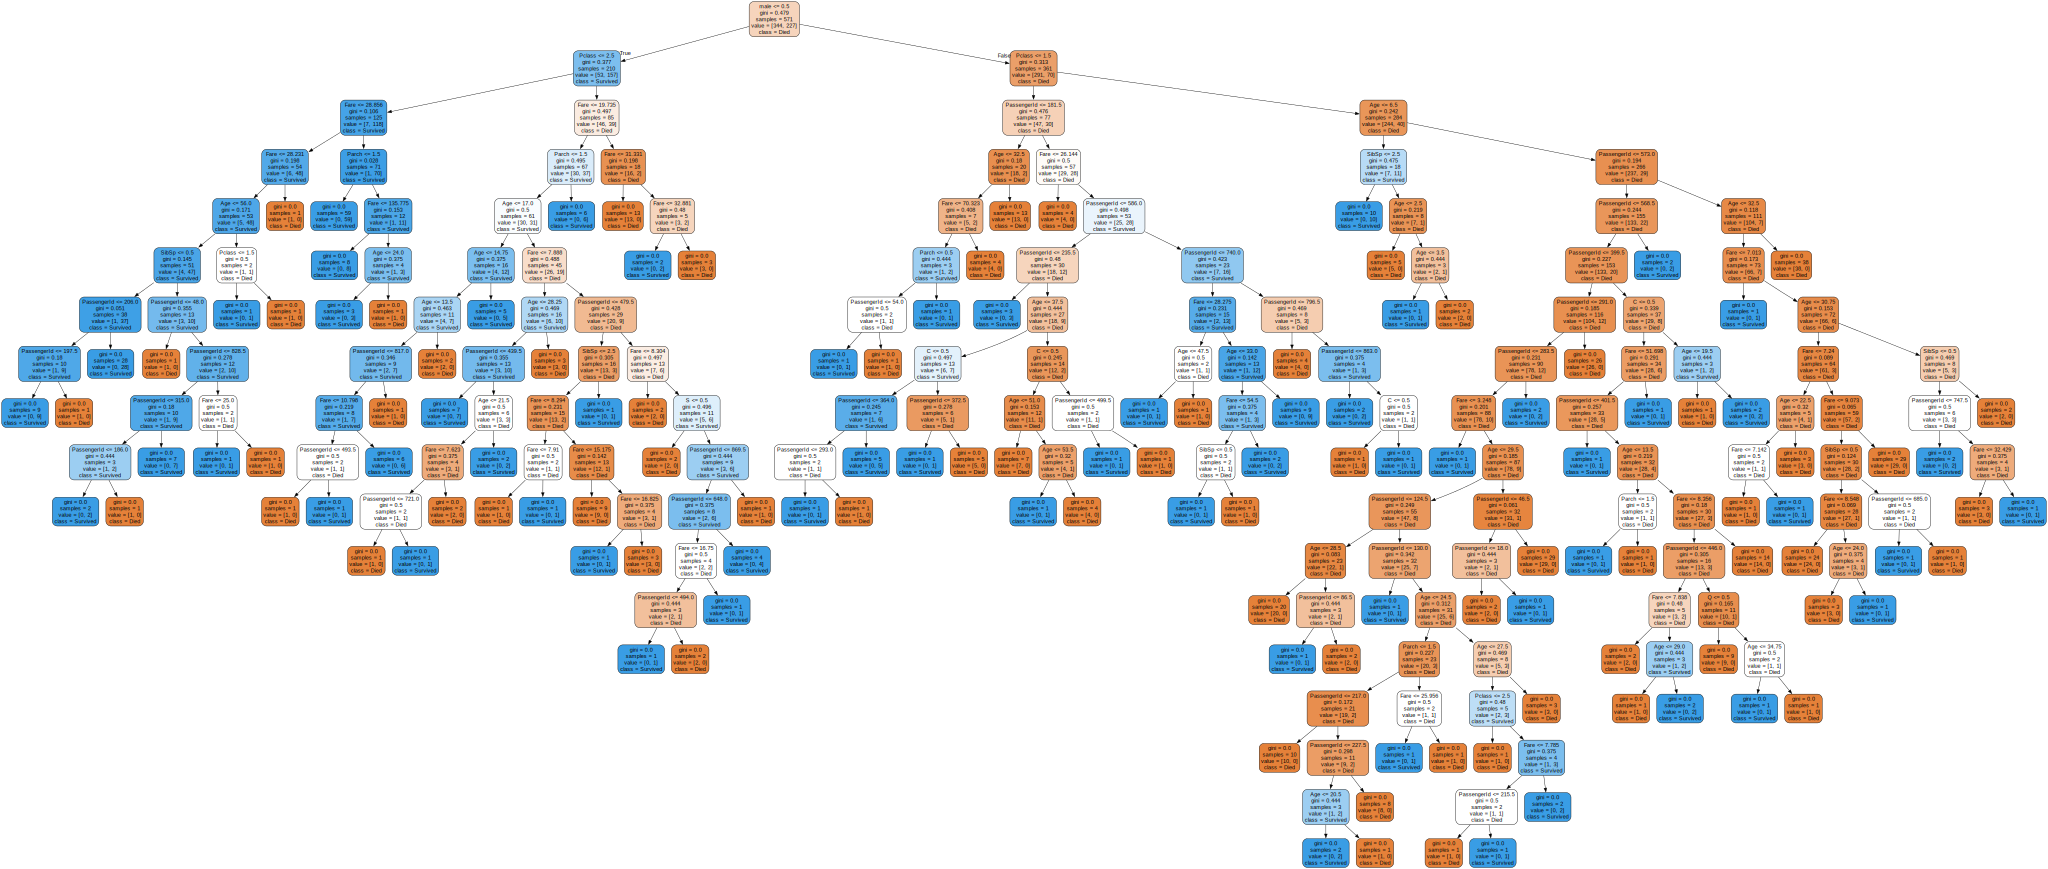

In [37]:
visualize_tree(tree_clf, X_train.columns, ["Died", "Survived"])

PassengerId should be irrelevant, but it allows for a binary search tree. Let's drop it.

In [38]:
X, X_train, X_test = X.drop("PassengerId", axis='columns'), X_train.drop("PassengerId", axis='columns'), X_test.drop("PassengerId", axis='columns')

tree_clf.fit(X_train, y_train)
tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.9877408056042032, 0.7622377622377622)

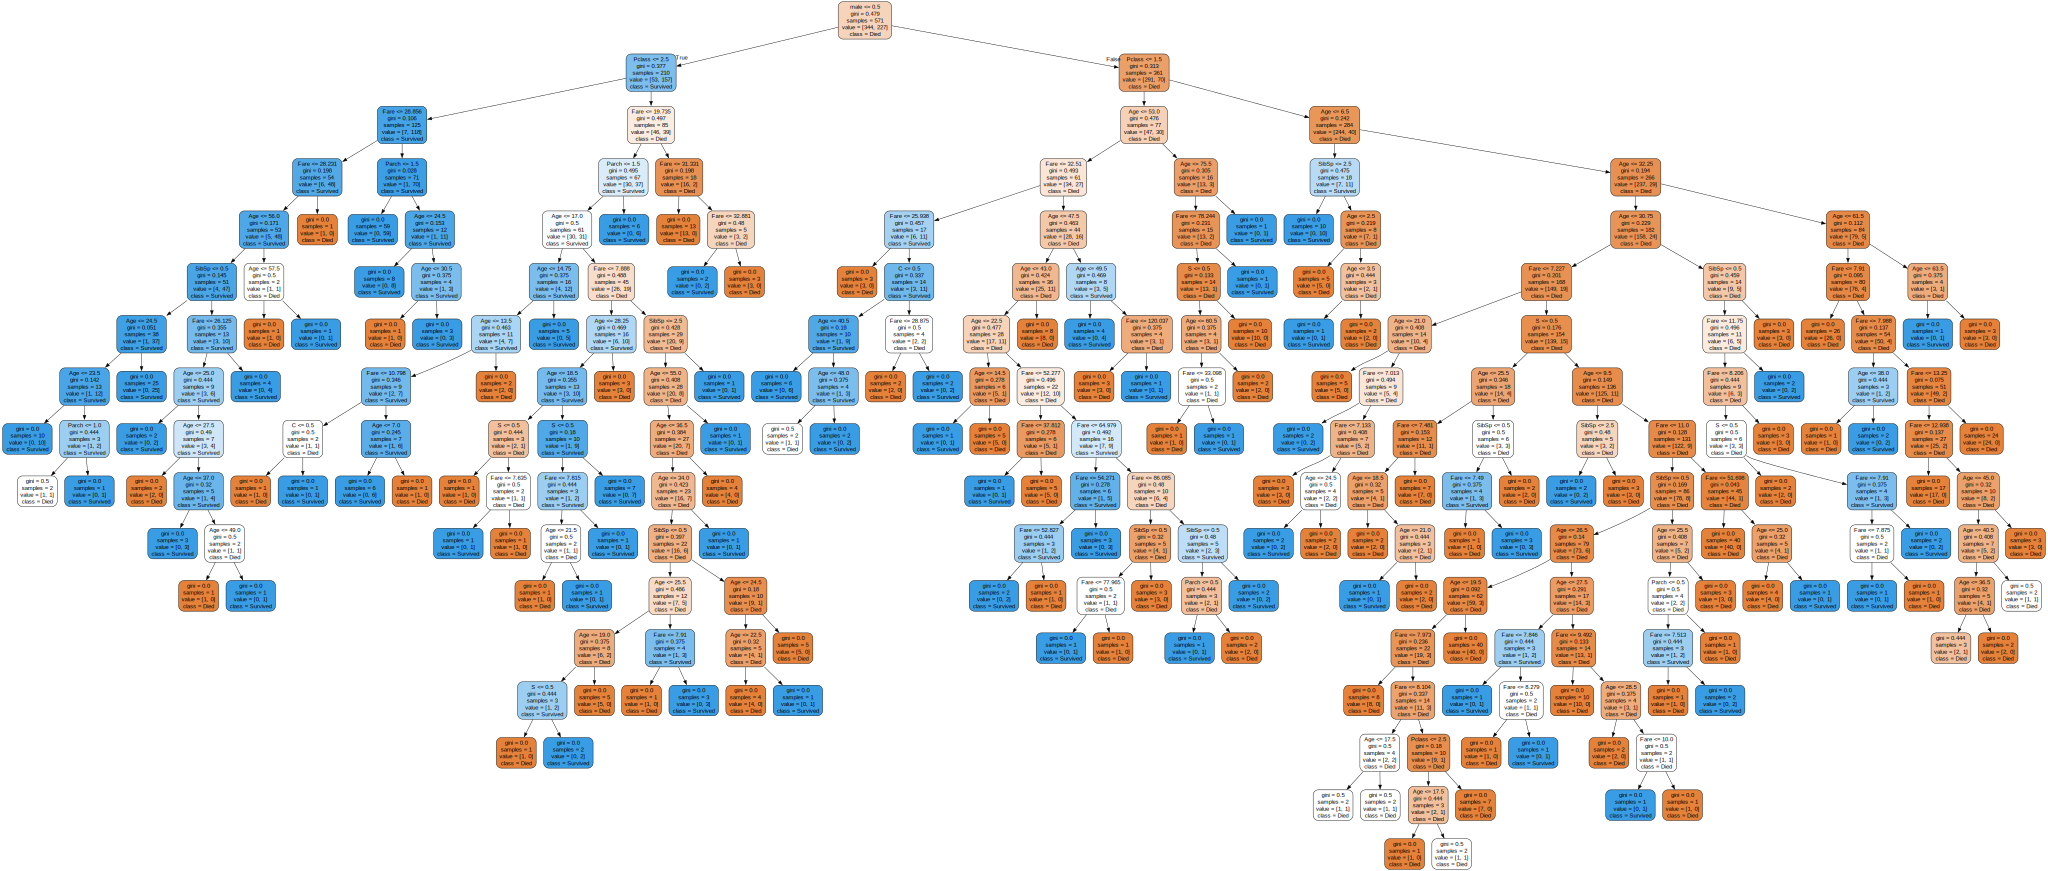

In [39]:
visualize_tree(tree_clf, X_train.columns, ["Died", "Survived"])

Unconstrained decision trees tend to overfit, because they end up close to full binary search trees.
We can constrain decision trees in several ways, the two most important are
* max_depth - puts a limit on how deep the tree can get. *Note*: The tree must be deep enough to accomodate all classes in the classification: 2^depth >= classes
* min_samples_split - forces a minimum of samples in a node before it gets split into subnodes
* max_features - forces the algorithm to only consider a certain number of features per node

In [40]:
tree_clf = DecisionTreeClassifier(random_state=504, max_depth=5)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.8651488616462347, 0.7832167832167832)

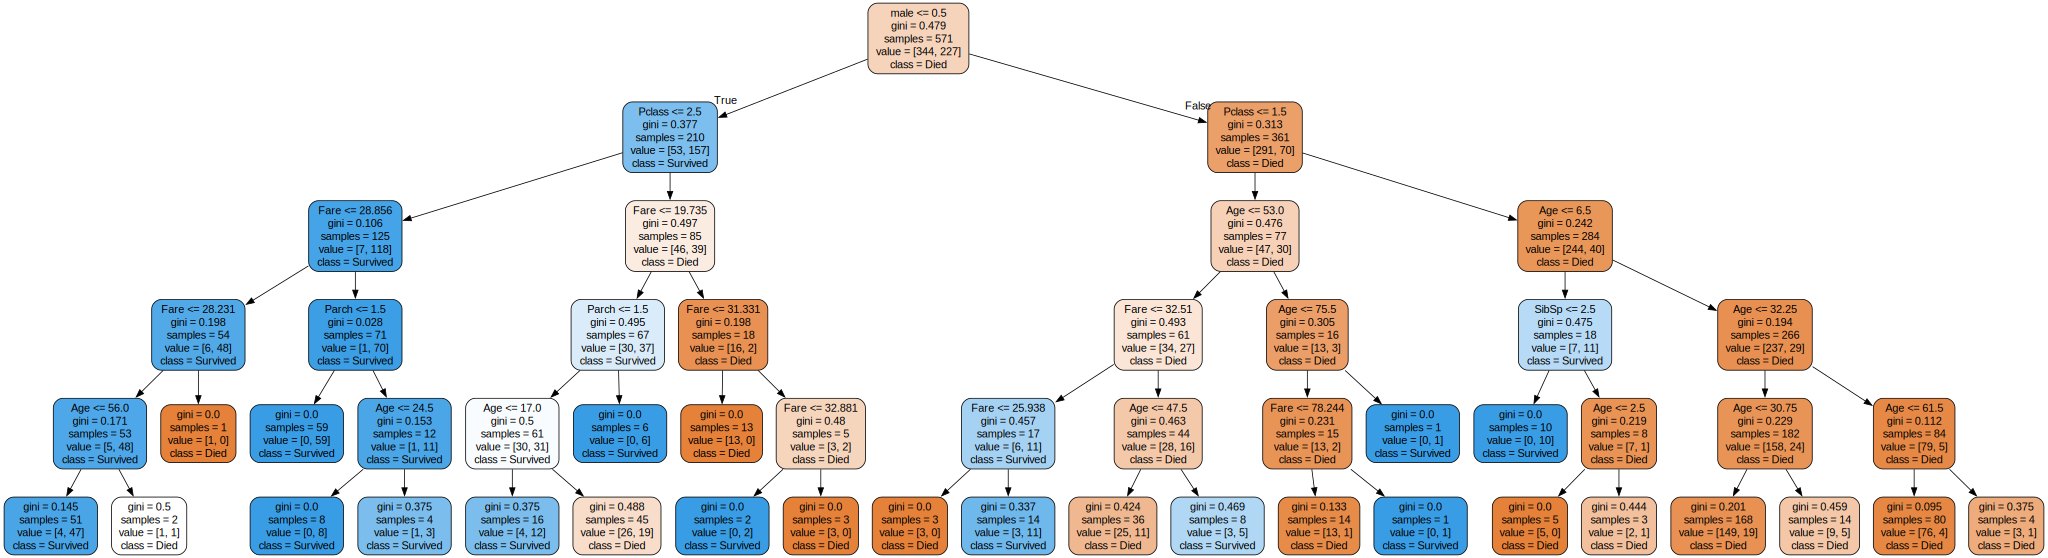

In [41]:
visualize_tree(tree_clf, X_train.columns, ["Died", "Survived"])

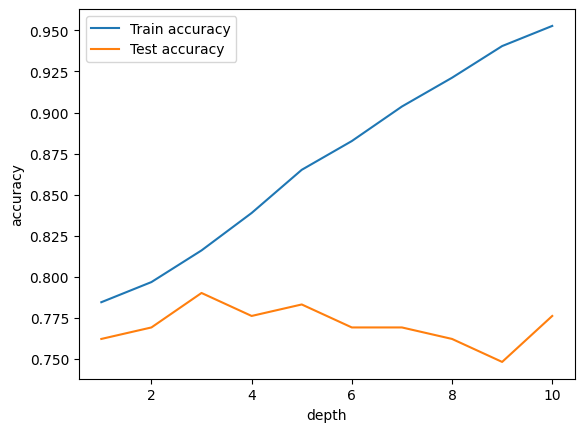

In [42]:
# Trying more depths
features = range(1, 11)

classifiers = [DecisionTreeClassifier(random_state=504, max_depth=d) for d in features]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, test_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="depth", ylabel="accuracy")

In [43]:
clf_best_depth = DecisionTreeClassifier(random_state=504, max_depth=3)
clf_best_depth.fit(X_train, y_train)
clf_best_depth.score(X_train, y_train), clf_best_depth.score(X_test, y_test)


(0.8161120840630472, 0.7902097902097902)

In [44]:
visualize_tree(clf_best_depth, X_train.columns, ["Died", "Survived"]).view()

'C:\\Users\\oih\\AppData\\Local\\Temp\\tmpz8oj9_8o.dot.pdf'

In [45]:
tree_clf = DecisionTreeClassifier(random_state=504, min_samples_split=10)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.9036777583187391, 0.7832167832167832)

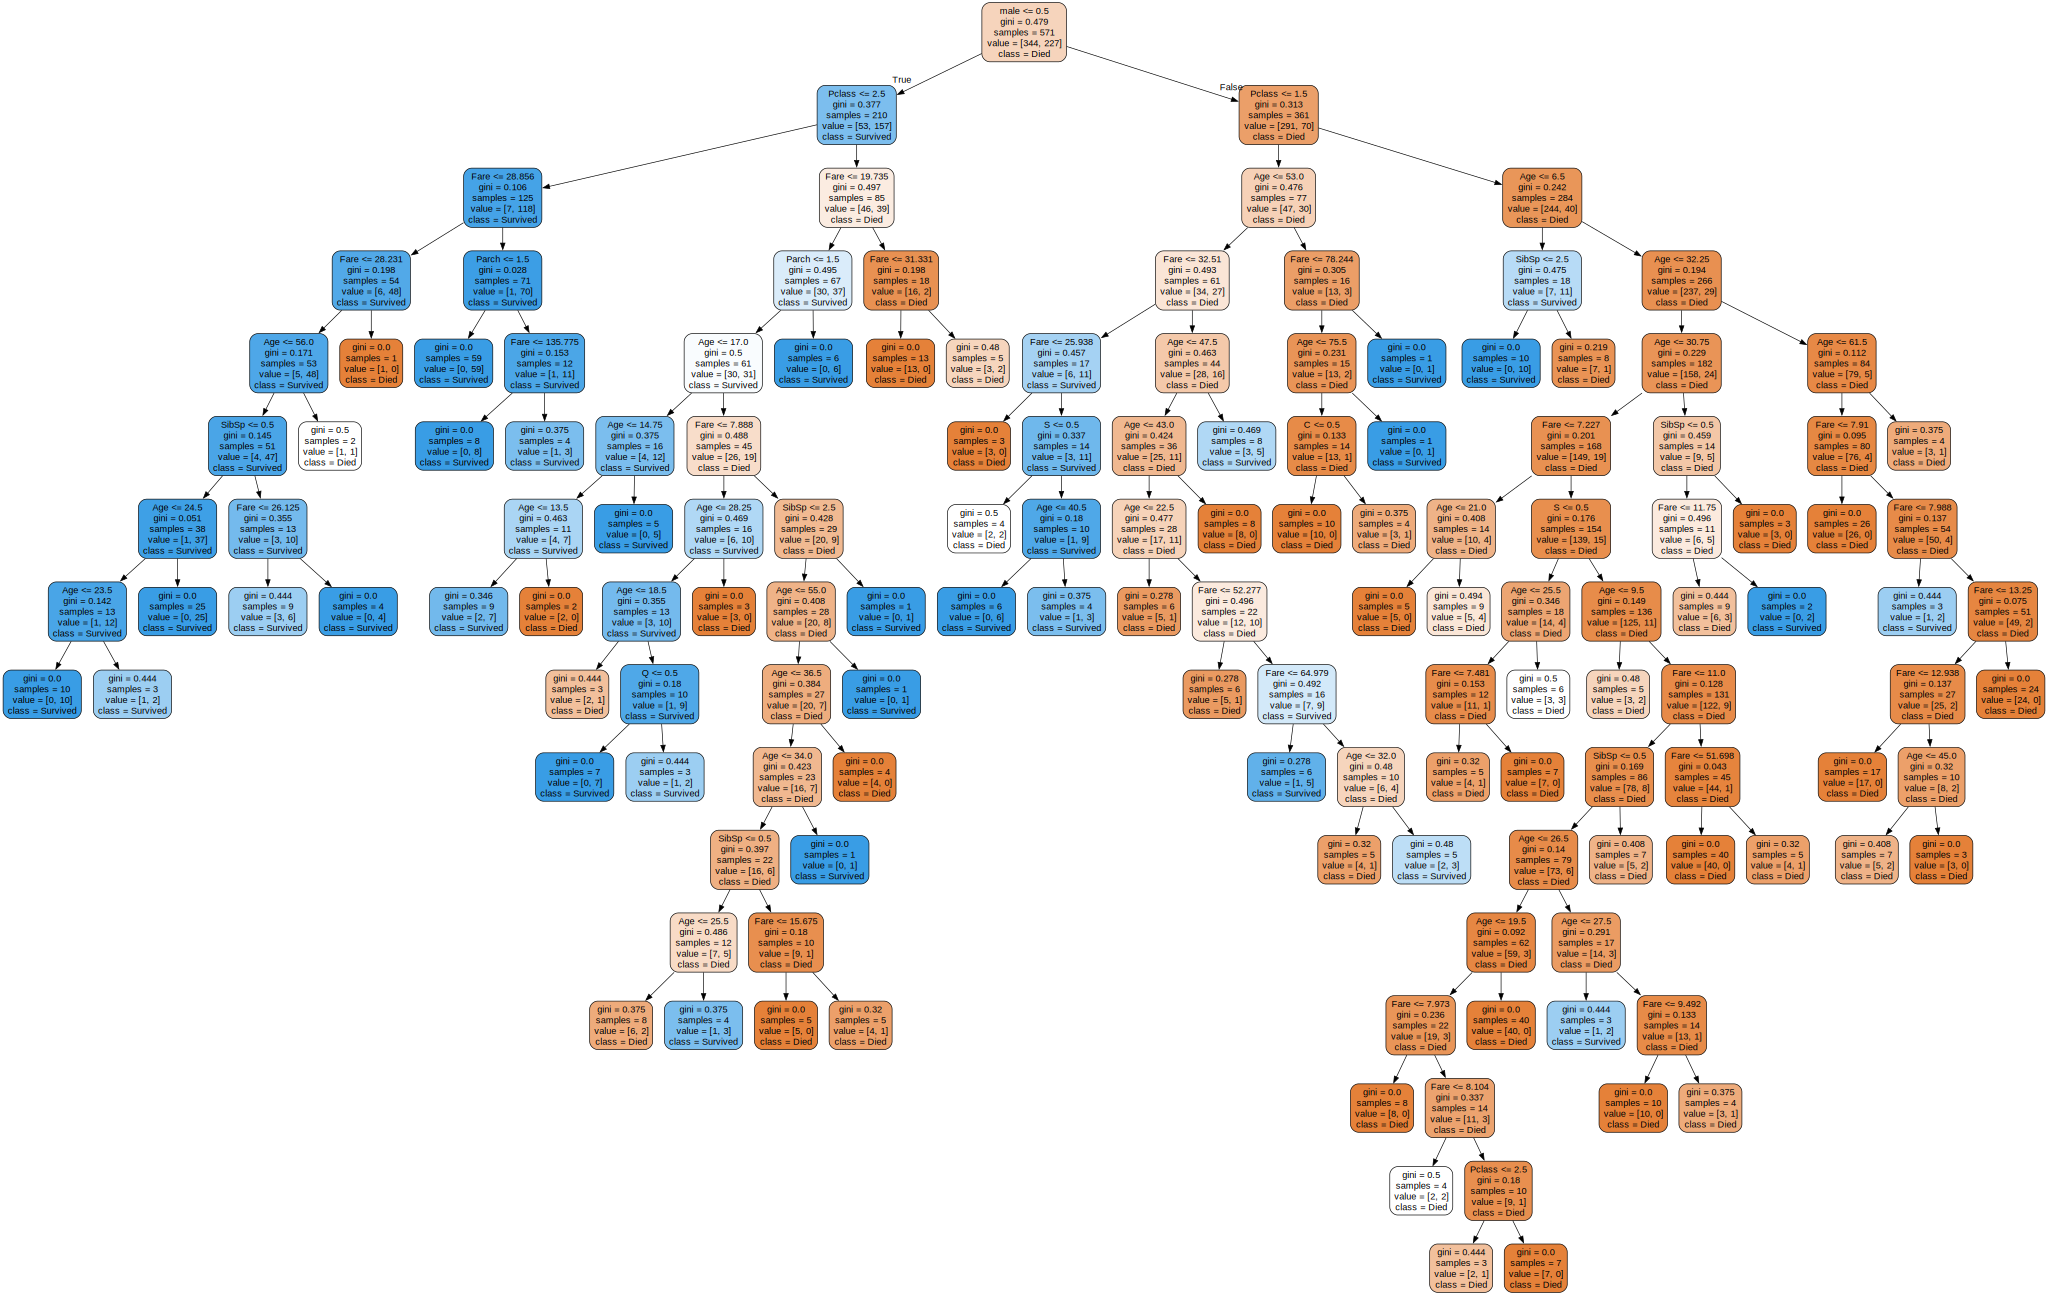

In [46]:
visualize_tree(tree_clf, X_train.columns, ["Died", "Survived"])

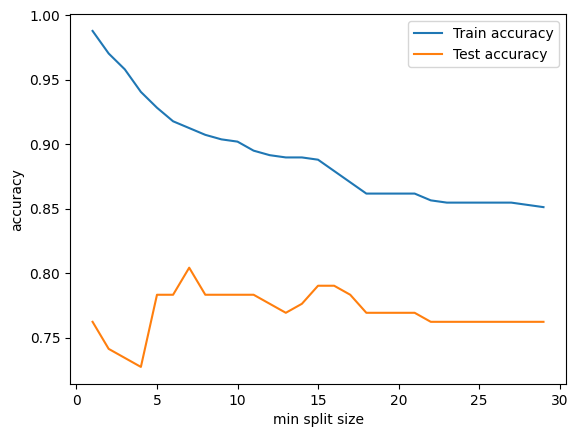

In [47]:
# Trying more node sizes
sizes = range(2, 31)

classifiers = [DecisionTreeClassifier(random_state=504, min_samples_split=s) for s in sizes]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, test_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="min split size", ylabel="accuracy")

In [48]:
tree_clf = DecisionTreeClassifier(random_state=504, max_features=2, max_depth=3)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.7320490367775832, 0.7202797202797203)

In [49]:
visualize_tree(tree_clf, X_train.columns, ["Died", "Survived"]).view()

'C:\\Users\\oih\\AppData\\Local\\Temp\\tmpojdhdns_.dot.pdf'

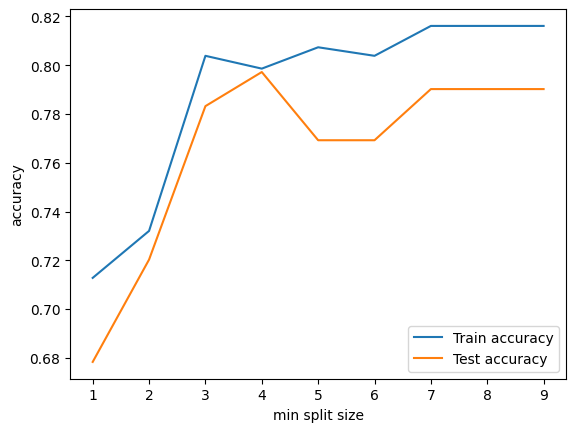

In [50]:
# Trying more feature sizes
features = range(1, 10)

classifiers = [DecisionTreeClassifier(random_state=504, max_features=f, max_depth=3) for f in features]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, test_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="min split size", ylabel="accuracy")

What if we combine the constraints?

In [51]:
from sklearn.model_selection import GridSearchCV
depths = range(1, 11)
sizes = range(2, 21)
features = range(1, 10)
params = {'min_samples_split': sizes, 
          'max_depth': depths, 
          'max_features': features}

gsc = GridSearchCV(DecisionTreeClassifier(random_state=504), params)
gsc.fit(X_train, y_train)
gsc.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_split=6,
                       random_state=504)

In [52]:
gsc.score(X_train, y_train), gsc.score(X_test, y_test)

(0.8266199649737302, 0.8111888111888111)

In [53]:
visualize_tree(gsc.best_estimator_, X_train.columns, ["Died", "Survived"]).view()

'C:\\Users\\oih\\AppData\\Local\\Temp\\tmpeoxvnwct.dot.pdf'

In [54]:
importances = zip(X_train.keys(), gsc.best_estimator_.feature_importances_) #pairs up feature names with performance score
sorted(importances, key=lambda p: -p[1])

[('male', 0.5809904456930507),
 ('Pclass', 0.16998786000842775),
 ('Fare', 0.09989376934018758),
 ('Age', 0.07523645200405892),
 ('SibSp', 0.04856712423427062),
 ('Parch', 0.023533610064401154),
 ('C', 0.0017907386556032924),
 ('Q', 0.0),
 ('S', 0.0)]